## GOAL
Dataset is having data of 54 sensors taken at 7 intervals.Goal of this notebook is to predict y2 which is performance metric of the batches. We have to do the predictions without shuffling the dataset while doing train test split.

In [189]:
#import libraries required for wrangling,preprocessing and modelling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [190]:
#read the data frame
df = pd.read_csv('data.csv',index_col=0);

In [191]:
df.head()

,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,x1_t2,...,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y1,y2
0,763.134041,768.107435,764.607484,765.236945,765.775778,765.619062,750.95,0.789998,0.801386,0.788737,...,87.2,2.030000,2.030000,2.030000,2.030000,2.030000,2.03,2.03,0.087,0.58
1,765.446797,763.464843,755.205877,754.690499,762.872823,767.775947,750.95,0.792258,0.807701,0.788356,...,87.2,2.030000,2.030000,2.030000,2.030000,2.030000,2.03,2.03,0.089,0.59
2,765.973495,768.980362,769.442794,771.473454,774.054794,762.862527,750.95,0.825336,0.795842,0.784642,...,87.2,2.368016,2.385767,2.432579,2.306701,2.297906,2.03,2.03,0.050,0.44
3,764.650659,765.909540,768.443158,767.678032,767.260418,769.040021,750.95,0.781667,0.788325,0.763070,...,87.2,2.030000,2.030000,2.030000,2.030000,2.030000,2.03,2.03,0.089,0.44
4,760.405529,766.774665,767.547864,766.582823,765.517300,769.685324,750.95,0.812201,0.825667,0.782709,...,87.2,2.231677,2.174763,2.351654,2.220314,2.204783,2.03,2.03,0.080,0.59


This is sensor data for 54 sensors taken at different time intervals. Usually performance of system is best described by either max or minimum readings from sensors. While solving this problem we tried with different discriptive stats like 'min', 'max','std' of the sensor values and found minimum works the best. Below cell creats new data frame `der_df` which contains 'min' of recorded values of listed sensors.
<br>
<br>
In below cell code is to create a derived data frame which will have minimum values of sensors mentioned in the 'itr' list. This sensors are recommended by the domain experts from Tvarit. 

In [192]:
der_df = pd.DataFrame()

itr = [6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21]
for i in itr:
    temp = pd.concat([df['x'+str(i)+'_t0'],df['x'+str(i)+'_t1'],df['x'+str(i)+'_t2'],
                      df['x'+str(i)+'_t3'],df['x'+str(i)+'_t4'],
                      df['x'+str(i)+'_t5'],df['x'+str(i)+'_t6']],axis=1)
    temp = temp.T.describe()
    der_df['x'+str(i)+'min'] = temp.loc['min']

We did standard normalization before as best practise since some algorith which uses eucliden distances like k means, knn requires standardization.

In [111]:
sc = StandardScaler()
std_der = pd.DataFrame(sc.fit_transform(der_df),columns=der_df.columns)

In [193]:
std_der.describe()

,x6min,x7min,x8min,x9min,x10min,x11min,x12min,x13min,x14min,x15min,x16min,x18min,x19min,x20min,x21min
count,8.830000e+02,8.830000e+02,8.830000e+02,8.830000e+02,8.830000e+02,8.830000e+02,8.830000e+02,8.830000e+02,8.830000e+02,8.830000e+02,8.830000e+02,883.0,8.830000e+02,8.830000e+02,8.830000e+02
mean,3.148985e-15,4.961050e-15,1.153956e-14,1.559090e-17,-3.771992e-16,-1.873423e-17,2.560491e-15,9.201146e-16,-1.529354e-15,1.231681e-15,2.331091e-15,0.0,7.551214e-16,1.974324e-16,4.494329e-16
std,1.000567e+00,1.000567e+00,1.000567e+00,1.000567e+00,1.000567e+00,1.000567e+00,1.000567e+00,1.000567e+00,1.000567e+00,1.000567e+00,1.000567e+00,0.0,1.000567e+00,1.000567e+00,1.000567e+00
min,-1.260814e+00,-1.793175e+00,-6.610886e+00,-2.322466e+00,-4.457822e+00,-7.556457e-01,-9.843699e+00,-9.893326e+00,-8.710913e+00,-1.011596e+00,-8.234118e-01,0.0,-1.174679e+01,-1.013250e+01,-4.614544e+00
25%,-5.445531e-01,-1.340629e+00,-1.147674e-01,-6.278206e-01,3.073164e-01,-2.837323e-01,-3.301213e-01,-7.073582e-01,-2.303922e-03,-8.620274e-01,-3.696338e-01,0.0,9.757306e-02,1.021391e-01,1.709549e-01
50%,1.909085e-02,4.648669e-01,-1.147674e-01,1.808485e-01,3.472611e-01,-2.358584e-01,-3.301213e-01,3.297924e-01,3.028464e-01,-8.620274e-01,-3.696338e-01,0.0,9.757306e-02,1.021391e-01,1.709549e-01
75%,1.909085e-02,4.648669e-01,-1.147662e-01,8.156501e-01,3.705017e-01,-2.358584e-01,-2.175712e-01,5.417830e-01,3.028464e-01,1.132219e+00,-3.696338e-01,0.0,9.757306e-02,1.021391e-01,1.709549e-01
max,3.003697e+00,1.593108e+00,3.782902e+00,2.225223e+00,5.419838e-01,6.335958e+00,2.912465e+00,2.120117e+00,1.895747e+00,1.182075e+00,2.730271e+00,0.0,9.757306e-02,1.021391e-01,5.913554e+00


Remove any collinear features having correlation coefficient greater than 0.9 if there are any.

In [194]:
# Create correlation matrix
corr_matrix = std_der.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

[]

In [195]:
#dropping any collinear columns if found
std_der.drop(columns = to_drop, axis=1,inplace=True);
data = std_der.copy()
y = df['y2']

### Univariate plots

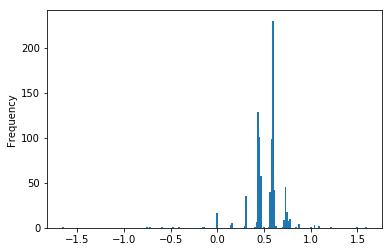

In [196]:
#histogram of y2
y.plot(kind='hist',bins=200);

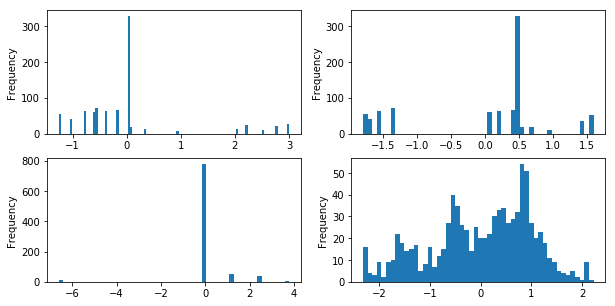

In [197]:
#histogram of sensor x6,x7,x8 and x9 minimum values
plt.figure(figsize=(10,5))
plt.subplot(221)
std_der.x6min.plot(kind='hist',bins=100)
plt.subplot(222)
std_der.x7min.plot(kind='hist',bins=50)
plt.subplot(223)
std_der.x8min.plot(kind='hist',bins=50)
plt.subplot(224)
std_der.x9min.plot(kind='hist',bins=50)

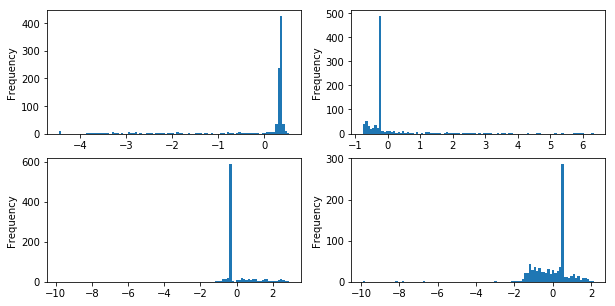

In [198]:
#histogram of sensor x10,x11,x12 and x13 minimum values
plt.figure(figsize=(10,5))
plt.subplot(221)
std_der.x10min.plot(kind='hist',bins=100)
plt.subplot(222)
std_der.x11min.plot(kind='hist',bins=100)
plt.subplot(223)
std_der.x12min.plot(kind='hist',bins=100)
plt.subplot(224)
std_der.x13min.plot(kind='hist',bins=100)

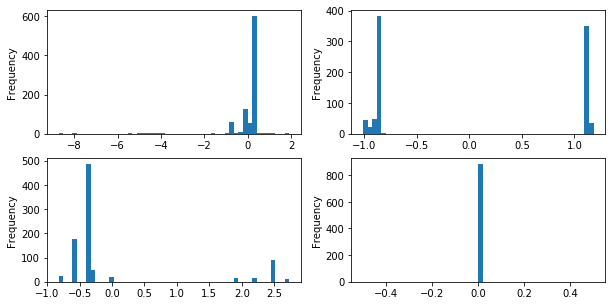

In [199]:
#histogram of sensor x14,x15,x16 and x17 minimum values
plt.figure(figsize=(10,5))
plt.subplot(221)
std_der.x14min.plot(kind='hist',bins=50)
plt.subplot(222)
std_der.x15min.plot(kind='hist',bins=50)
plt.subplot(223)
std_der.x16min.plot(kind='hist',bins=50)
plt.subplot(224)
std_der.x18min.plot(kind='hist',bins=50)

In [132]:
data = std_der.copy()
print(data.index)
y = df['y2']
print(y.index)

RangeIndex(start=0, stop=883, step=1)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            873, 874, 875, 876, 877, 878, 879, 880, 881, 882],
           dtype='int64', length=883)


In [200]:
temp = pd.concat([data,y],axis=1)
data = temp.copy()

As per histograms sensors x8 and x18 are centred around one value and do not have distribution so we tried to drop both but found results improved with x8 but there was more error when we dropped x18 values

In [201]:

data.drop(columns=['x8min'],axis=1,inplace=True) #dropped already
data.shape

(883, 15)

In [217]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(data.iloc[:,:-1],data['y2'],test_size=0.05,
                                                     random_state=3,shuffle=False)
y_test_hat = []
y_test_hat_1 =[]
for idx in X_test1.index.values:   
    rf = GradientBoostingRegressor(n_estimators = 700,random_state=30)   
    rf.fit(X_train1, y_train1)
    y_test_hat.extend(rf.predict(X_test1.loc[X_test1.index == idx]))
    X_train1.loc[idx] = X_test1.loc[idx]
    y_train1.loc[idx] = y_test1.loc[idx]
    
y_test_hat = pd.Series(y_test_hat, index=y_test1.index)

print('R2 score is :',metrics.r2_score(y_test1,y_test_hat))
print('RMSE is :',metrics.mean_squared_error(y_test1,y_test_hat)**0.5)

R2 score is : 0.5167496137174541
RMSE is : 0.10795123765003675


In [221]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(data.iloc[:,:-1],data['y2'],test_size=0.05,
                                                     random_state=3,shuffle=False)

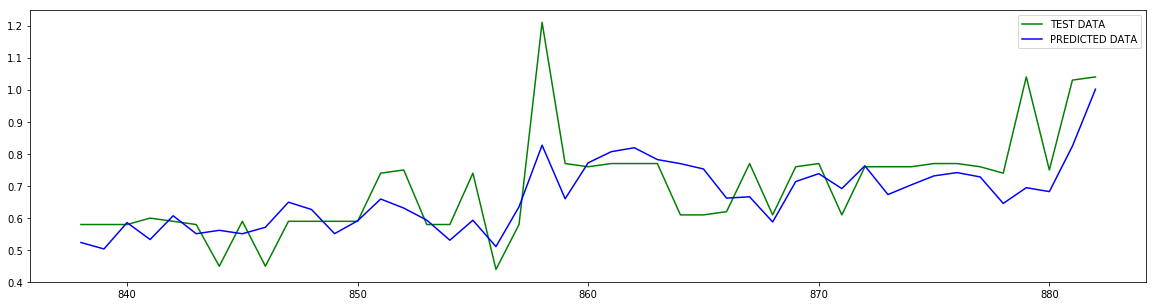

In [234]:
plt.figure(figsize=(20,5))
plt.plot(y_test1,'g',label='TEST DATA')
plt.plot(y_test_hat,'b',label='PREDICTED DATA')
plt.legend()
plt.show()


We achieved R2 score of 0.516 and RMSE of 0.107, as we can see at the end of test set, our model starts producing good result compared to initial events where y test is above 0.9 which means that may be our train data didn't have values which lies above 0.9.